<a href="https://colab.research.google.com/github/rhanda2/Data-Science-Articence-Assignment/blob/main/Data_Science_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries
I have used pandas to process the data into different formats and sub-topical aspects and the date-time library to get the number of days through the dates(ship date and order date) provided in the dataset.

In [ ]:
import pandas as pd
import datetime

In [ ]:
data = pd.read_csv("Data Science Evaluation.csv")
data.head()

,Region,Country,Item Type,Fiscal Year,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit as % of Cost
0,Sub-Saharan Africa,Cote d'Ivoire,Snacks,2010,Online,C,4/23/10,241891753,4/26/10,10000,152.58,97.44,1525800.0,974400.0,551400.0,0.565887
1,Sub-Saharan Africa,Ethiopia,Snacks,2010,Online,H,6/6/10,530075585,7/1/10,10000,152.58,97.44,1525800.0,974400.0,551400.0,0.565887
2,Central America and the Caribbean,Panama,Clothes,2011,Offline,H,1/2/11,293357980,1/22/11,10000,109.28,35.84,1092800.0,358400.0,734400.0,2.049107
3,Europe,Sweden,Office Supplies,2012,Online,L,10/2/12,360841929,10/20/12,10000,651.21,524.96,6512100.0,5249600.0,1262500.0,0.240495
4,Europe,Romania,Cosmetics,2016,Online,M,3/16/16,707318103,5/3/16,10000,437.20,263.33,4372000.0,2633300.0,1738700.0,0.660274


##Division into Sub-Topical DataFrames on the basis of Region
---
I am separating the dataset by Region to have 7 separate dataframes for the 7 regions. 

In [ ]:
regionList = ['Asia', 'Australia and Oceania',
       'Central America and the Caribbean', 'Europe',
       'Middle East and North Africa', 'North America',
       'Sub-Saharan Africa']
dataframeListByRegion = regionList
for x in range(len(regionList)):
  dataframeListByRegion[x] = data[data["Region"] == regionList[x]].reset_index().drop(columns="index")

Asia, AustraliaAndOceania, CentralAmericaAndTheCaribbean, Europe, MiddleEastAndNorthAfrica, NorthAmerica, SubSaharanAfrica = dataframeListByRegion

##Relation between Items and their Profitability
---
I have tried to make a bar graph showing the mean profitability of each item. I am comparing those through a bar graph.
###Inference:
---
We can clearly see a high profitability percentage for clothes and somewhat high profitability for Cereals and Vegetables. So we can say that increasing the sale of such products would increase profit more substancially. Meat and office supplies have a very low profitability and thus we can make a decision to increase the sale of other products on their expense.



Item Type
Baby Food          0.601305
Beverages          0.492608
Cereal             0.756468
Clothes            2.049107
Cosmetics          0.660274
Fruits             0.348266
Household          0.329785
Meat               0.156846
Office Supplies    0.240495
Personal Care      0.442209
Snacks             0.565887
Vegetables         0.694270
Name: Profit as % of Cost, dtype: float64


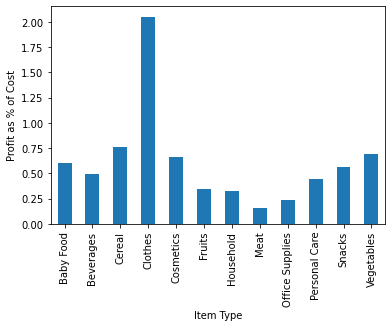

In [ ]:
def itemProfitsOverallRelation(df):
  itemProfitsOverall = df.groupby("Item Type")["Profit as % of Cost"].mean()
  itemProfitsOverall.plot(kind="bar", ylabel="Profit as % of Cost")
  return itemProfitsOverall
print(itemProfitsOverallRelation(data))

##Relation between Items and their Profitability By Year
---
This function helps us determine if there was any change in profitability with respect to change in years.
###Inference
---
We see that the graph for this function very closely resembles the graph for the previous function and thus we can assume no to minimal change with respect to years and thus acting on our previous inference is supported for future years.


Item Type   Fiscal Year
Baby Food   2010           0.601305
            2011           0.601305
            2012           0.601305
            2013           0.601305
            2014           0.601305
                             ...   
Vegetables  2013           0.694270
            2014           0.694270
            2015           0.694270
            2016           0.694270
            2017           0.694270
Name: Profit as % of Cost, Length: 96, dtype: float64

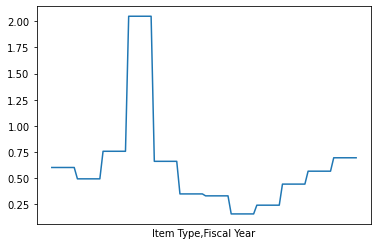

In [ ]:
def itemProfitsByYear(df):
  itemProfitsByYear = df.groupby(["Item Type", "Fiscal Year"])["Profit as % of Cost"].mean()
  itemProfitsByYear.plot(y="Profit as % of Cost",xticks=[])
  return itemProfitsByYear
itemProfitsByYear(data)  

## Relation between Regions and their Profitability
---
I have tried to make a bar graph showing the mean and median profitability of each item. I am comparing those through a bar graph.
## Inference
---
The values of the mean profitability corresponding to the seven regions is very close and thus the disparity is not enough to act on. If we are adamant to make a conclusion we can look at the median values of profitability. We see that for Asia, North America, and Sub-Saharan Africa more than 50% of the data points provide us with more than 50% of profitability (approx. 56%).


,Region,Profit as % of Cost,Median
0,Asia,0.613162,0.565887
1,Australia and Oceania,0.606901,0.492608
2,Central America and the Caribbean,0.611853,0.492608
3,Europe,0.610915,0.492608
4,Middle East and North Africa,0.602093,0.492608
5,North America,0.616335,0.565887
6,Sub-Saharan Africa,0.613292,0.565887


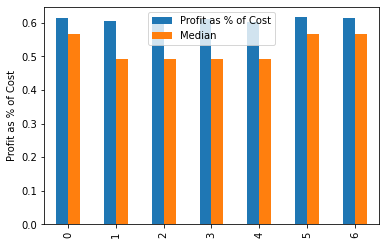

In [ ]:
def regionProfitsOverallRelation(df):
  temp = df.groupby("Region")["Profit as % of Cost"].mean()
  regionProfitsOverall = temp.to_frame().reset_index()
  regionProfitsOverall["Median"] = df.groupby('Region')["Profit as % of Cost"].median().values.tolist()
  regionProfitsOverall.plot.bar(ylabel="Profit as % of Cost")
  return regionProfitsOverall
regionProfitsOverallRelation(data)  

## Relation between Regions and Items with respect to Profitability
---
From previously established sub-datasets pertaining to each region we have plotted separate graphs to see if the mean profitabilities for each item perform similarly in each bar graph. 
## Inference
---
It can be seen that the shape of the graphs for each region is similar to the graph that we made for overall dataset. We can conclude that the profitability return behavior is constant even with a varying regional variable. 

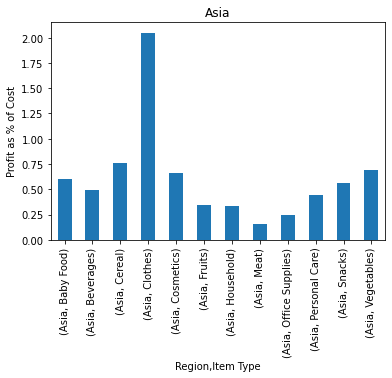

In [ ]:
def regionProfitsByItem(df):
    temp = df.groupby(["Region", "Item Type"])["Profit as % of Cost"].mean()
    temp.plot.bar(ylabel="Profit as % of Cost", title=df["Region"][0])
regionProfitsByItem(Asia)

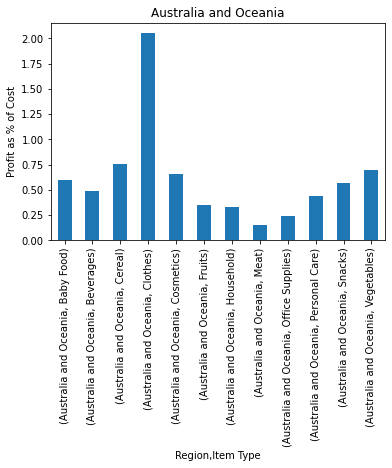

In [ ]:
regionProfitsByItem(AustraliaAndOceania)

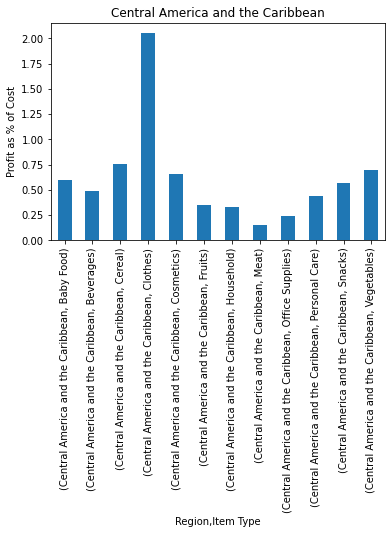

In [ ]:
regionProfitsByItem(CentralAmericaAndTheCaribbean)

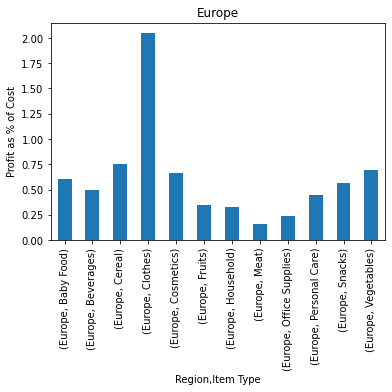

In [ ]:
regionProfitsByItem(Europe)

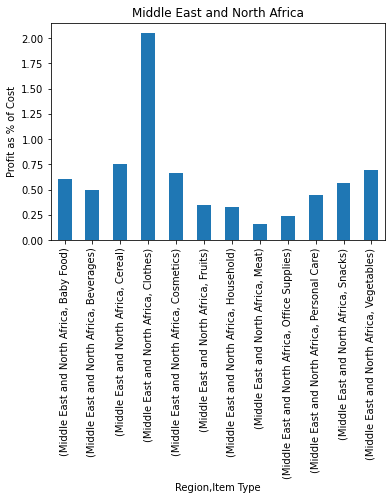

In [ ]:
regionProfitsByItem(MiddleEastAndNorthAfrica)

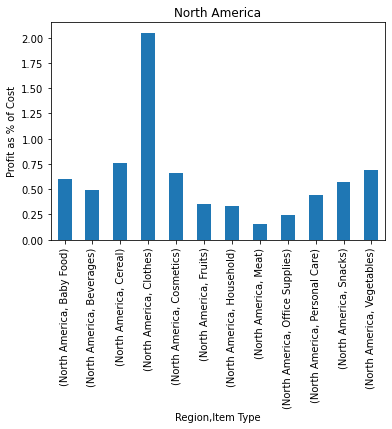

In [ ]:
regionProfitsByItem(NorthAmerica)

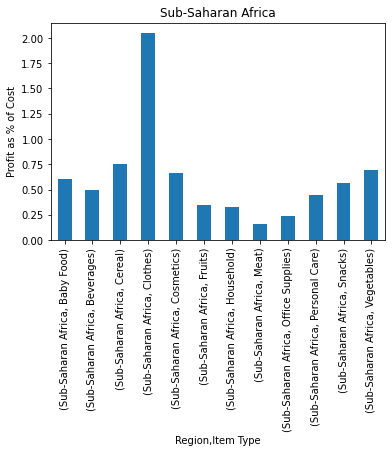

In [ ]:
regionProfitsByItem(SubSaharanAfrica)

## Parser for date to number of days between order and shipping

I used the datetime library to convert the parsed dates and get the number of days between them.

In [ ]:
def dateParsingIntoNumDays(df):  
  df[["Order Month", "Order Day", "Order Year"]] = df["Order Date"].str.split("/",expand=True,)
  df[["Ship Month", "Ship Day", "Ship Year"]] = df["Ship Date"].str.split("/",expand=True,)
  numDays = []
  for x in df.values :
    orderDate = datetime.date(int(x[18]) + 2000, int(x[16]), int(x[17]))
    shipDate = datetime.date(int(x[21]) + 2000, int(x[19]), int(x[20]))
    numDays.append((shipDate - orderDate).days)
  df["Number of Days"] = numDays
  df.sort_values(["Region", "Item Type"], inplace=True)
dateParsingIntoNumDays(data)

## Grouping number of days with respect to both region and items

The function returns the dataframe containing grouped values of the mean number of days for a region item relationship.

In [ ]:
def groupingNumDaysWithRegionItem(df):
  temp = df.groupby(["Region", "Item Type"])["Number of Days"].mean() 
  numDaysByRegionItem = temp.to_frame().reset_index()
  numDaysByRegionItem.drop(columns="Number of Days")
  numDaysByRegionItem["NumDays Mean"] = temp.values.tolist()
  temp = df.groupby(["Region", "Item Type"])["Number of Days"].median()
  numDaysByRegionItem["NumDays Median"] = temp.values.tolist()  
  return numDaysByRegionItem


##Finding Mode of the number of days taken to ship for every item in a region
This gives us an idea of the general trend or frequent trend of ease to ship a particular item in a region. 

In [ ]:
for x in dataframeListByRegion:
  print(x["Region"][0])
  temp = x.groupby("Item Type")["Number of Days"].agg(lambda x:x.value_counts().index[0])
  print(temp)

Asia
Item Type
Baby Food          46
Beverages          34
Cereal              1
Clothes            17
Cosmetics          32
Fruits             29
Household          20
Meat               36
Office Supplies    15
Personal Care      47
Snacks              6
Vegetables         20
Name: Number of Days, dtype: int64
Australia and Oceania
Item Type
Baby Food          12
Beverages          19
Cereal              5
Clothes            31
Cosmetics          10
Fruits              5
Household          30
Meat                7
Office Supplies    29
Personal Care       9
Snacks              8
Vegetables         42
Name: Number of Days, dtype: int64
Central America and the Caribbean
Item Type
Baby Food          23
Beverages          40
Cereal             27
Clothes            46
Cosmetics          14
Fruits             50
Household           7
Meat               12
Office Supplies    15
Personal Care      29
Snacks              3
Vegetables         22
Name: Number of Days, dtype: int64
Europe
Item 

##Relationship between Items and Ease to sell
---
I aggregated number of days with respect to item type by taking means and medians, and grouped those together. By plotting the average means and medians of number of days for each item I planned to compare different items visually.
###Inference
Cosmetics, Cereals and Beverages are easier to sell(in reference to number of days taken) of the lot. While, Baby Food, Clothes and Personal Care items take the most number of days.

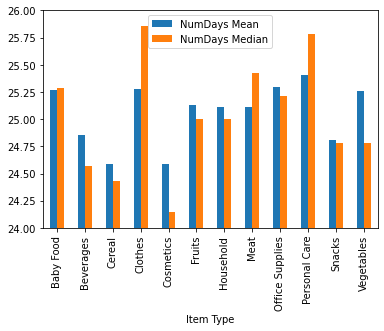

In [ ]:
def itemDayRelativity(df):
  itemDayDistribution = df.groupby("Item Type").agg({"NumDays Mean" : "mean", "NumDays Median" : "mean"})
  itemDayDistribution.reset_index(inplace=True)
  itemDayDistribution.plot.bar(x="Item Type",  ylim=[24,26])
itemDayRelativity(groupingNumDaysWithRegionItem(data))

##Relationship between Regions and Ease to sell
---
I aggregated number of days with respect to the regions by taking means and medians, and grouped those together. By plotting the average means and medians of number of days for each region I planned to compare different regions visually.
###Inference
Australia and Oceania, as well as, Sub-Saharan Africa are easier to sell in(in reference to number of days taken) of the lot. While,Asia and North America take the most number of days to sell in.

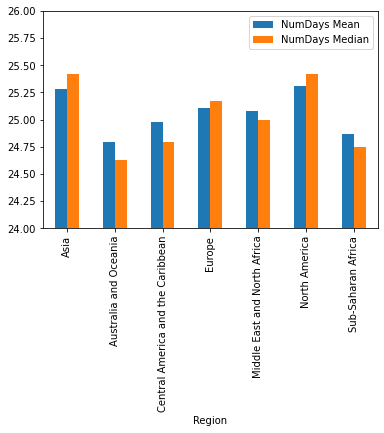

In [ ]:
def regionDayRelativity(df):
  regionDayDistribution = df.groupby("Region").agg({"NumDays Mean" : "mean", "NumDays Median" : "mean"})
  regionDayDistribution.reset_index(inplace=True)
  regionDayDistribution.plot.bar(x="Region", ylim=[24,26])
regionDayRelativity(groupingNumDaysWithRegionItem(data))